In [ ]:
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import fbprophet
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the datasets
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Active,Cured,Death
0,1,Andaman and Nicobar Islands,166,3494,52
1,2,Andhra Pradesh,70357,570667,5506
2,3,Arunachal Pradesh,2216,5903,14
3,4,Assam,30182,132712,597
4,5,Bihar,12958,159022,874
5,6,Chandigarh,2537,8049,140
6,7,Chhattisgarh,35850,56773,728
7,8,Dadra and Nagar Haveli and Daman and Diu,205,2755,2
8,9,Delhi,30836,220866,5087
9,10,Goa,5646,23857,376


In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Active'] + df['Cured'] + df['Death']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (24th September, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (24th September, 2020): 5732518


In [ ]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Active,Cured,Death,Total cases
0,Andaman and Nicobar Islands,166,3494,52,3712
1,Andhra Pradesh,70357,570667,5506,646530
2,Arunachal Pradesh,2216,5903,14,8133
3,Assam,30182,132712,597,163491
4,Bihar,12958,159022,874,172854
5,Chandigarh,2537,8049,140,10726
6,Chhattisgarh,35850,56773,728,93351
7,Dadra and Nagar Haveli and Daman and Diu,205,2755,2,2962
8,Delhi,30836,220866,5087,256789
9,Goa,5646,23857,376,29879


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 966382


,Total Active
Name of State / UT,
Maharashtra,273883
Karnataka,94671
Andhra Pradesh,70357
Uttar Pradesh,61698
Tamil Nadu,46249
Kerala,42858
Chhattisgarh,35850
Odisha,34547
Delhi,30836


In [ ]:
df1 = pd.read_csv('covid_cases.csv')
df1['Date']= pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1.drop(columns=[df1.columns[0]], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       305 non-null    datetime64[ns]
 1   Confirmed  305 non-null    int64         
 2   Death      305 non-null    int64         
 3   Recovered  305 non-null    int64         
 4   Active     305 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.0 KB


In [ ]:
df1.head()

,Date,Confirmed,Death,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [ ]:
df1.tail(10)

,Date,Confirmed,Death,Recovered,Active
295,2020-11-12,8728795,128668,8115580,484547
296,2020-11-13,8773479,129188,8163572,480719
297,2020-11-14,8814579,129635,8205728,479216
298,2020-11-15,8845127,130070,8249579,465478
299,2020-11-16,8874290,130519,8290370,453401
300,2020-11-17,8912907,130993,8335109,446805
301,2020-11-18,8958483,131578,8383602,443303
302,2020-11-19,9004365,132162,8428409,443794
303,2020-11-20,9050597,132726,8478124,439747
304,2020-11-21,9095806,133227,8521617,440962


In [ ]:
confirmed = df1.loc[:, ['Date', 'Confirmed']]
deaths = df1.loc[:, ['Date', 'Death']]
recovered = df1.loc[:, ['Date', 'Recovered']]
active = df1.loc[:, ['Date', 'Active']]

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Death'], mode='lines+markers', name='Deaths', line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=active['Date'], y=active['Active'], mode='lines+markers', name='Active', line=dict(color='Red', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [ ]:
!pip install prophet

In [ ]:
from fbprophet import Prophet
confirmed = df1.loc[:, ['Date', 'Confirmed']]
deaths = df1.loc[:, ['Date', 'Death']]
recovered = df1.loc[:, ['Date', 'Recovered']]
active = df1.loc[:, ['Date', 'Active']]

In [ ]:
confirmed.columns = ['ds','y']
confirmed.tail(7)

,ds,y
298,2020-11-15,8845127
299,2020-11-16,8874290
300,2020-11-17,8912907
301,2020-11-18,8958483
302,2020-11-19,9004365
303,2020-11-20,9050597
304,2020-11-21,9095806


In [ ]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
307,2020-11-24
308,2020-11-25
309,2020-11-26
310,2020-11-27
311,2020-11-28


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
305,2020-11-22,9.406554e+06,9.277348e+06,9.530489e+06
306,2020-11-23,9.459720e+06,9.333765e+06,9.590670e+06
307,2020-11-24,9.516870e+06,9.391085e+06,9.644809e+06
308,2020-11-25,9.576880e+06,9.434323e+06,9.700557e+06
309,2020-11-26,9.635453e+06,9.507341e+06,9.775808e+06
310,2020-11-27,9.694304e+06,9.560495e+06,9.836865e+06
311,2020-11-28,9.752737e+06,9.604281e+06,9.889844e+06


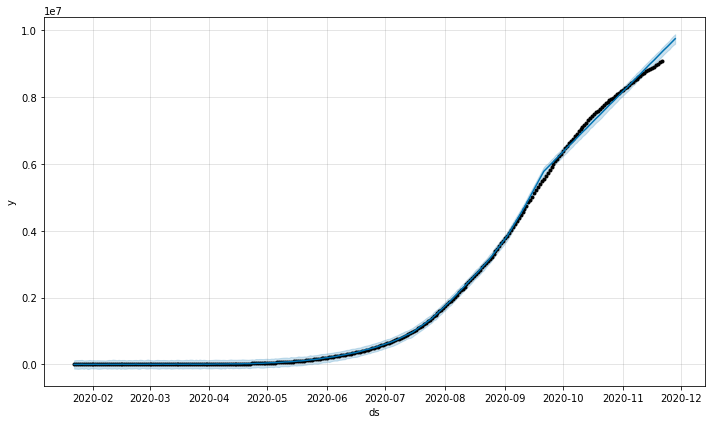

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

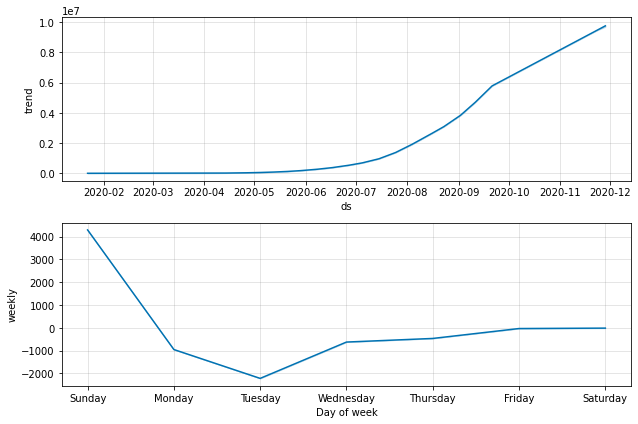

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast) 

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths.tail()

,ds,y
300,2020-11-17,130993
301,2020-11-18,131578
302,2020-11-19,132162
303,2020-11-20,132726
304,2020-11-21,133227


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future1 = m.make_future_dataframe(periods=7)
future1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
307,2020-11-24
308,2020-11-25
309,2020-11-26
310,2020-11-27
311,2020-11-28


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
305,2020-11-22,137422.293629,135554.891240,139324.213528
306,2020-11-23,138088.874197,136123.020126,139947.673146
307,2020-11-24,138856.210343,136885.210987,140627.915375
308,2020-11-25,139604.356961,137900.528566,141439.757163
309,2020-11-26,140338.690184,138386.184938,142355.968417
310,2020-11-27,141068.609183,139105.099520,143054.587541
311,2020-11-28,141779.270777,139778.591684,143761.226345


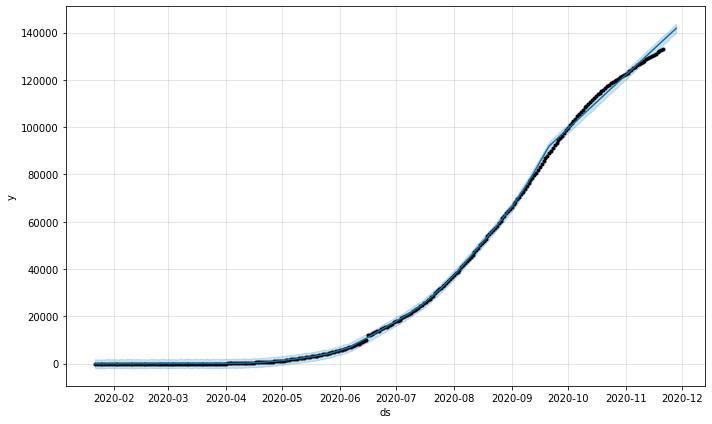

In [ ]:
deaths_forecast_plot = m.plot(forecast1)

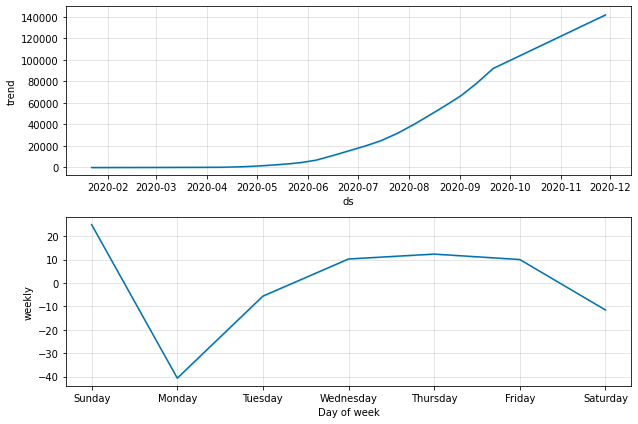

In [ ]:
deaths_forecast_plot =m.plot_components(forecast1) 

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered.tail()

,ds,y
300,2020-11-17,8335109
301,2020-11-18,8383602
302,2020-11-19,8428409
303,2020-11-20,8478124
304,2020-11-21,8521617


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future2 = m.make_future_dataframe(periods=7)
future2.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
307,2020-11-24
308,2020-11-25
309,2020-11-26
310,2020-11-27
311,2020-11-28


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
305,2020-11-22,8.890860e+06,8.771390e+06,9.017848e+06
306,2020-11-23,8.957764e+06,8.844415e+06,9.080730e+06
307,2020-11-24,9.025224e+06,8.902388e+06,9.154666e+06
308,2020-11-25,9.093256e+06,8.964709e+06,9.207657e+06
309,2020-11-26,9.160445e+06,9.041671e+06,9.294333e+06
310,2020-11-27,9.228308e+06,9.105366e+06,9.368147e+06
311,2020-11-28,9.295981e+06,9.161799e+06,9.431663e+06


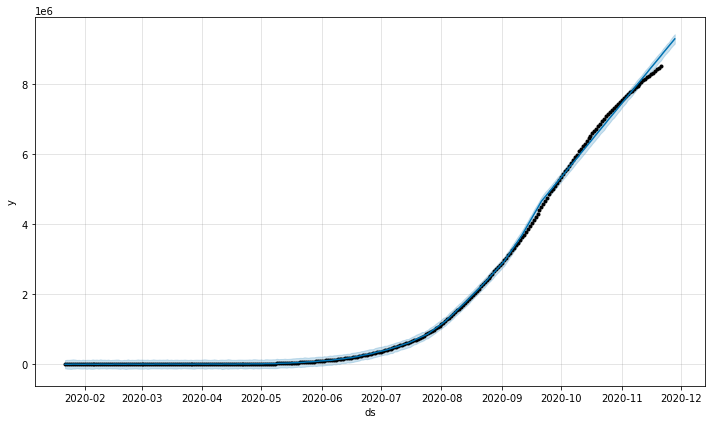

In [ ]:
recovered_forecast_plot = m.plot(forecast2)

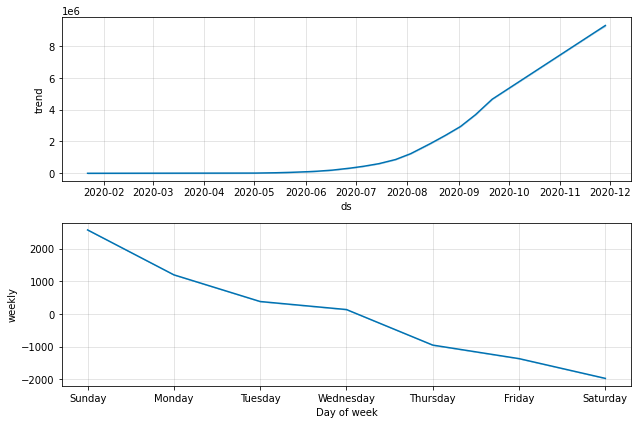

In [ ]:
recovered_forecast_plot =m.plot_components(forecast2) 